<a href="https://colab.research.google.com/github/Saleti-Thrinadh-3/Machine-Learning/blob/main/SVM_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [108]:
#importing dataset 
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [109]:
#display the first 5 rows in our dataset
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
#check null values are occurred or not
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
#display the basic marthematical description
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

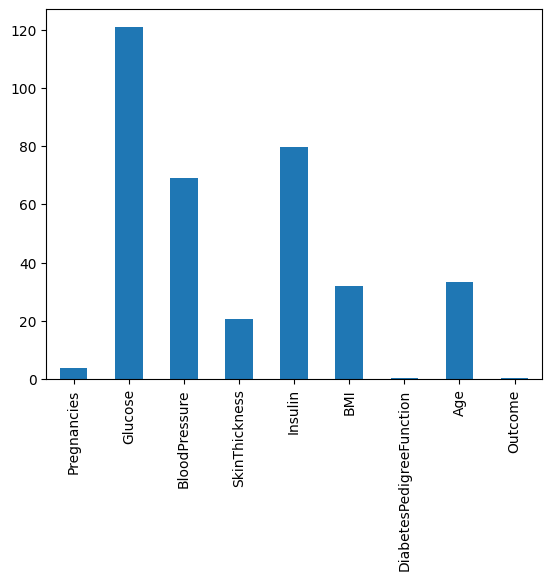

In [112]:
#display plot representation for mean 
ds.describe().loc['mean'].plot.bar()

<Axes: >

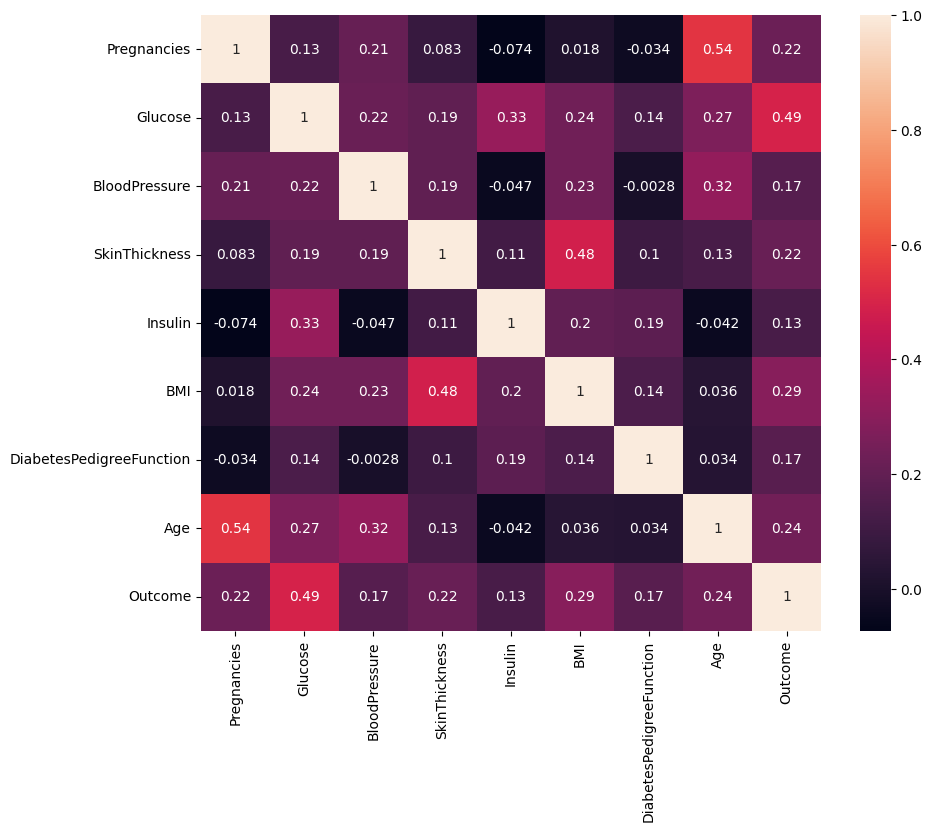

In [180]:
#display correlation between each other
import seaborn as sb
plt.figure(figsize=(10,8))
sb.heatmap(ds.corr(),annot=True)

In [115]:
#in some rows of important columns are filled with zeros so these are replaced with the mean value
zna=['Glucose','BloodPressure','SkinThickness']
for col in zna:
  ds[col]=ds[col].replace(0,np.NaN)
  mean=float(ds[col].mean(skipna=True))
  ds[col]=ds[col].replace(np.NaN,mean)

In [116]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1


<Axes: >

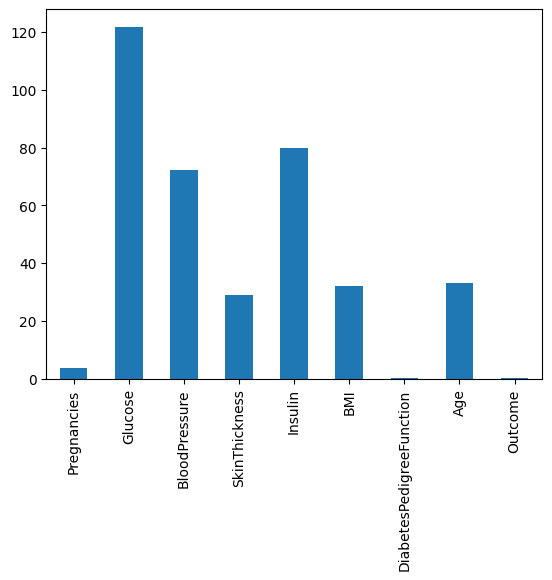

In [117]:
ds.describe().loc['mean'].plot.bar()

In [121]:
#copy the features into x and target into y
x=ds.drop('Outcome',axis=1).values
y=ds['Outcome'].values
y=y.reshape(-1,1)

In [122]:
#display shape of the dataset
x.shape,y.shape

((768, 8), (768, 1))

In [160]:
#split the dataset into train data and test data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [181]:
#display shape of the splitted dataset
xtrain.shape,xtest.shape

((614, 8), (154, 8))

In [167]:
#linear kernel is used when data is linearly seperable
svm1=svm.SVC(kernel='linear')
#train the model
svm1.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [168]:
#predict the model when give the test dataset
ypred=svm1.predict(xtest)

In [169]:
#display the accuracy of the model
svm1.score(xtrain,ytrain),svm1.score(xtest,ytest)

(0.760586319218241, 0.7987012987012987)

In [170]:
#display the confusion matrix
confusion_matrix(ytest,ypred)

array([[96, 11],
       [20, 27]])

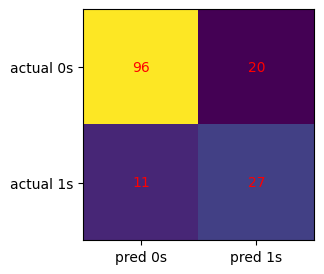

In [175]:
#display confusion matrix with plot representation
cm=confusion_matrix(ytest,ypred)
fig,dm=plt.subplots(figsize=(3,3))
dm.imshow(cm)
dm.grid(False)
dm.xaxis.set(ticks=(0,1),ticklabels=('pred 0s','pred 1s'))
dm.yaxis.set(ticks=(0,1),ticklabels=('actual 0s','actual 1s'))
for i in range(2):
  for j in range(2):
    dm.text(i,j,cm[i,j],ha='center',va='center',color='red')

In [177]:
#display classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

